Sub Task A results: https://arxiv.org/pdf/1903.08983.pdf

Data from: https://github.com/sandro272/SemEval2019-OffensEval/tree/51dde8c38b512d5fb536fd74b2afd3dc7ed73831/train_data

https://github.com/sandro272/SemEval2019-OffensEval/tree/51dde8c38b512d5fb536fd74b2afd3dc7ed73831/test_data

pre-processing: https://github.com/sandro272/SemEval2019-OffensEval/blob/51dde8c38b512d5fb536fd74b2afd3dc7ed73831/code/demo.py#L9



In [ ]:
import torch   
from torchtext import data, datasets 
from torchtext.data import TabularDataset 
import pandas as pd
from torchtext.vocab import Vectors
from torch.nn import init
import torch.nn as nn
from torchtext.vocab import Vectors
import matplotlib.pyplot as plt

if torch.cuda.is_available():
  DEVICE = "cuda"
else:
  DEVICE = "cpu"
# print(DEVICE)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/576-project"

'Check-In #1.gdoc'		        “prepocess_data.ipynb”的副本
'Check in #2.gdoc'		        prepocess_emoji.py
'Final Write-Up COSC576 Project.gdoc'   prepocess.ipynb
 glove.6B.200d.txt		       'Presentation Project COSC576.gslides'
 modelv1.ipynb			       'Project Proposal COSC576.gdoc'
 modelv2.ipynb			        testdata.csv
 modelv3.ipynb			        traindata.csv
 modelv4.ipynb			        train_subtask_a.tsv


In [ ]:
torch.manual_seed(2020)
torch.backends.cudnn.deterministic = True

In [ ]:
# reference this: https://github.com/pytorch/text/blob/c839a7934930819be7e240ea972e4d600966afdc/torchtext/data/field.py#L61
# default tokenizer is string.split(), another idea would be to use spacy (but would split things like i'm)
# We need to load the data and by make use of Fields we can tell torch.text how we want it to look like.
# Our dataset has two kinds of fields, the reviews and the labels. Fields expects words as inputs and 
# will build a vocabulary later on. So if you're field is not numericalized (like our reviews) you set pass
# use_vocab=False and sequential=False

LABEL = data.Field(sequential=False,
                   use_vocab=False, 
                   dtype = torch.float,
                   batch_first=True)

TEXT = data.Field(sequential=True,  
                  lower=True,
                  include_lengths=True,
                  batch_first=True)


read traindata and testdata

In [ ]:
traindata = pd.read_csv('/content/drive/My Drive/576-project/traindata.csv')
testdata = pd.read_csv('/content/drive/My Drive/576-project/testdata.csv')

create train and validation set
(the proportion is 8:2)

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(traindata, test_size=0.2)
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)

In [ ]:
train.head()
testdata.head()

,tweet,label
0,WhoIsQ WheresTheServer DumpNike DECLASFISA...,1
1,ConstitutionDay is revered by Conservatives ...,0
2,FOXNews NRA MAGA POTUS TRUMP 2ndAmendmen...,0
3,Watching Boomer getting the news that she is...,0
4,NoPasaran Unity demo to oppose the far right...,1


In [ ]:
trainvalid_datafields = [("label", LABEL),("tweet", TEXT)]
test_datafields = [("label", LABEL),("tweet", TEXT)]


train, valid = data.TabularDataset.splits(path='.', train='train.csv', validation='val.csv', format='csv', skip_header=True,
                                       fields=trainvalid_datafields)
test = data.TabularDataset('/content/drive/My Drive/576-project/testdata.csv', format='tsv', skip_header=True,
        fields=test_datafields)

test the results

In [ ]:
print(train[5])
print(train[5].__dict__.keys())

for i in range(20):
  print(vars(train.examples[i]))

print(f'\nTraining sample size: {len(train)}')
print(f'Validation sample size: {len(valid)}')
print(f'Test sample size: {len(test)}')

dict_keys(['label', 'tweet'])
{'label': '1', 'tweet': ['a', 'little', 'note', 'for', 'the', 'bible', 'have', 'you', 'ever', 'read', 'that', 'says', 'that', 'if', 'the', 'holy', 'spirit', 'is', 'in', 'us', 'that', 'we', 'can', 'fight', 'off', 'the', 'devil', 'you', 'lie', 'and', 'cla', 'i', 'am', 'that', 'you', 'are', 'holy', 'no', 'human', 'is', 'holy', 'by', 'the', 'way', 'so', 'how', 'dare', 'you', 'blame', 'the', 'devil', 'your', 'new', 'name', 'is', 'pope', 'false', 'prophet']}
{'label': '1', 'tweet': ['he', 'orchestrated', 'provoked', 'it', 'so', 'that', 'he', 'could', 'cry', 'that', 'he', 'was', 'the', 'vict', 'i', 'am', 'of', 'a', 'yet', 'another', 'conspiracy', 'he', 'is', 'such', 'desperate', 'weirdo']}
{'label': '1', 'tweet': ['i', 'call', 'her', 'the', 'negative', 'nel', 'lie', 'who', 'lives', 'in', 'my', 'brain', 'i', 'constantly', 'battle', 'with', 'her', 'she', 'is', 'a', 'creep']}
{'label': '0', 'tweet': ['this', 'has', 'gone', 'on', 'for', 'too', 'long', 'imo', 'trump',

In [ ]:

# build vocabulary and initialize the words with the pretrained embeddings 
# initialize glove embeddings type, glove.42B.300d
TEXT.build_vocab(train, min_freq = 3, vectors = 'glove.6B.200d',  unk_init = torch.Tensor.normal_)  

# Unique words in train 
print("Size of vocabulary:", len(TEXT.vocab))

# Commonly used words
# print(TEXT.vocab.freqs)  
print(TEXT.vocab.freqs.most_common(10)) 

# the 200 dimensional vectors
# print(TEXT.vocab.vectors) 

.vector_cache/glove.6B.zip:  12%|█▏        | 106M/862M [00:29<1:38:38, 128kB/s] 

In [ ]:
# process and batch data. torchtext uses Iterator and BucketIterator.
# BucketIterator shuffles that data and groups reviews with similar length together. 
# So padding is minimized for each batch, and then we can go ahead and feed each batch to the neural network

from torchtext.data import Iterator, BucketIterator

In [ ]:
BATCH_SIZE = 64 # try larger batch size (32, 64, 128, 256)
train_iter, val_iter = data.BucketIterator.splits(
    (train, valid), 
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.tweet),
    sort_within_batch=True, 
    device = DEVICE)

test_iter = data.Iterator(dataset=test, batch_size=BATCH_SIZE, train=False,
                          sort=False, device=DEVICE)

# The sort_within_batch argument, when set to True, sorts the data within each
# minibatch in decreasing order according to the sort_key. This is necessary 
# when you want to use pack_padded_sequence with the padded sequence data and
# convert the padded sequence tensor to a PackedSequence object.

In [ ]:
# checking grouping is OK
for i, batch in enumerate(train_iter):
  tweet, tweet_length = batch.tweet
  print(tweet_length)
  if i == 5:
    break

tensor([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16], device='cuda:0')
tensor([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 16, 16], device='cuda:0')
tensor([21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20], device='cuda:0')
tensor([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
  

In [ ]:
class sentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, 
                 bidirectional, dropout, mode):
        super().__init__()          
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.mode = mode
        if self.mode == "LSTM":
          self.rnn = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=num_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout,
                           batch_first=True)
        elif self.mode == "GRU":
          self.rnn = nn.GRU(embedding_dim, hidden_dim, num_layers, 
                            dropout=dropout,
                            batch_first=True, bidirectional=bidirectional)
        else:
          RuntimeWarning("wrong rnn type")

        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, tweet, tweet_length):
        embed = self.embedding(tweet)
   
        packed_embed = nn.utils.rnn.pack_padded_sequence(embed, tweet_length, batch_first=True)
        
        if self.mode == "LSTM":
          _, (hidden, cell) = self.rnn(packed_embed)
        else:
          _, hidden = self.rnn(packed_embed)   

        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)

        output=self.fc(hidden)

        output=self.sigmoid(output)
        
        return output

In [ ]:
n_epochs = 30
size_of_vocab = len(TEXT.vocab)
embedding_dim = 200
hidden_dim = 64
output_dim = 1
num_layers = 2
bidirection = True
dropout = 0.1

model = sentiment(size_of_vocab, embedding_dim, hidden_dim, output_dim, num_layers, 
                   bidirectional = True, dropout = dropout, mode="GRU")
model = model.to(DEVICE)


In [ ]:
# number of parameters in model
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

# number of training data
len(train)

# Note we have way too many parameters compared to training data so our model will 
# have a tendency to overfit. We will need to make use of a lot of regularization (dropout)

1308569


10592

In [ ]:
# Initialize the GloVe
pretrained_embeddings = TEXT.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)

print(pretrained_embeddings.shape)

torch.Size([5659, 200])


In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()
criterion = criterion.to(DEVICE)

In [ ]:
def accuracy_func(y_pred, y):
    y_pred = torch.round(y_pred)
    correct = (y_pred == y).float() 
    accuracy = correct.sum() / len(correct)
    return accuracy

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

def f1_score_macro(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    f1 = f1_score(labels_flat, pred_flat,average='macro')
    return np.sum(f1)

In [ ]:
def f1_score(preds, labels): #try different values of t
    y_pred = torch.round(y_pred)
    TP = (labels == 1).float & (y_pred == 1).float


    TP = np.sum((labels_flat == 1) & (pred_flat == 1))
    FP = np.sum((labels_flat == 0) & (pred_flat == 1))
    FN = np.sum((labels_flat == 1) & (pred_flat == 0))  
    precision_1 = TP / (TP + FP)
    #precision_0
    recall = TP / (TP + FN)
    #recall_0 =
    f1 = 2 * precision * recall / (precision + recall)
    return np.sum(f1)

In [ ]:
def train_eval(model, iterator, optimizer, criterion, mode):

    total_loss = 0 
    total_accuracy = 0
    label_true = []
    label_model = []
    
    if mode == "train":
      model.train()
      for batch in iterator:
        optimizer.zero_grad() 

        tweet, tweet_len = batch.tweet  
        label_pred = model(tweet, tweet_len).squeeze() 
        #print(label_pred.detach().cpu().numpy()) 
        
        loss = criterion(label_pred, batch.label)        
        accuracy = accuracy_func(label_pred, batch.label)   
        
        loss.backward()       
        optimizer.step()      

        total_loss += loss.item()  
        total_accuracy += accuracy.item()    
        
      mean_loss = total_loss / len(iterator)
      mean_accuracy = total_accuracy / len(iterator)

    elif mode == "eval":
      model.eval()
      with torch.no_grad():
        for batch in iterator:

          tweet, tweet_len = batch.tweet  
          label_pred = model(tweet, tweet_len).squeeze()  
          
          loss = criterion(label_pred, batch.label)
          accuracy = accuracy_func(label_pred, batch.label)
            
          total_loss += loss.item()
          total_accuracy += accuracy.item()

          label_true.append(batch.label.data.to('cpu'))
          label_model.append(label_pred.data.to('cpu'))

        mean_loss = total_loss / len(iterator)
        mean_accuracy = total_accuracy / len(iterator)
        
    else:
      return "Wrong Mode"

    return mean_loss, mean_accuracy, label_true, label_model

Epoch: 1, Train Loss: 0.3189,Validation Loss: 0.5789, Train Accuracy: 86.80%, Validation Accuracy: 73.67%
Epoch: 2, Train Loss: 0.2348,Validation Loss: 0.6694, Train Accuracy: 90.91%, Validation Accuracy: 72.41%
Epoch: 3, Train Loss: 0.1496,Validation Loss: 0.8044, Train Accuracy: 94.29%, Validation Accuracy: 72.35%
Epoch: 4, Train Loss: 0.0875,Validation Loss: 1.0574, Train Accuracy: 96.94%, Validation Accuracy: 73.61%
Epoch: 5, Train Loss: 0.0587,Validation Loss: 1.2505, Train Accuracy: 98.15%, Validation Accuracy: 73.80%
Epoch: 6, Train Loss: 0.0391,Validation Loss: 1.3892, Train Accuracy: 98.85%, Validation Accuracy: 72.43%
Epoch: 7, Train Loss: 0.0330,Validation Loss: 1.5073, Train Accuracy: 98.94%, Validation Accuracy: 72.33%
Epoch: 8, Train Loss: 0.0219,Validation Loss: 1.6236, Train Accuracy: 99.30%, Validation Accuracy: 72.79%
Epoch: 9, Train Loss: 0.0157,Validation Loss: 1.7651, Train Accuracy: 99.52%, Validation Accuracy: 72.58%
Epoch: 10, Train Loss: 0.0154,Validation Loss:

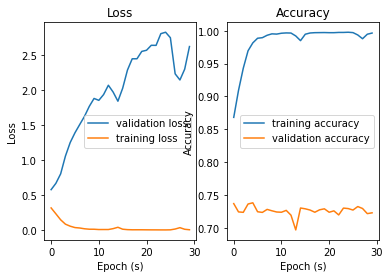

In [ ]:
from sklearn.metrics import f1_score

plot_val_loss = []
plot_train_loss = []
plot_val_accuracy = []
plot_train_accuracy = []

for epoch in range(n_epochs):
     
    train_loss, train_accuracy, label_true, label_pred = train_eval(model, train_iter, optimizer, criterion, "train")
 
    val_loss, val_accuracy, label_true, label_pred = train_eval(model, val_iter, optimizer, criterion, "eval")
    #print(f1_score_macro(label_true, label_pred))
    #break
    plot_val_loss.append(val_loss)
    plot_train_loss.append(train_loss)
    plot_val_accuracy.append(val_accuracy)
    plot_train_accuracy.append(train_accuracy)


    print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f},Validation Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy*100:.2f}%, Validation Accuracy: {val_accuracy*100:.2f}%')

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(plot_val_loss, label='validation loss')
ax1.plot(plot_train_loss, label='training loss')
ax2.plot(plot_train_accuracy, label='training accuracy')
ax2.plot(plot_val_accuracy, label='validation accuracy')

ax1.set_xlabel('Epoch (s)')
ax1.set_ylabel('Loss')
ax1.set_title('Loss')
ax1.legend()


ax2.set_xlabel('Epoch (s)')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy')
ax2.legend()
3
plt.show()

In [ ]:
label_true

[]